In [1]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# make sample data
n_classes = 3
X, y = make_classification(n_samples=200, n_features=5,
                           n_informative=3, n_redundant=2
                           , n_clusters_per_class=2
                           , n_classes=n_classes
                           , weights=[0.3, 0.2, 0.5]
                           , random_state=99)
y = label_binarize(y, classes=[0,1,2])

In [4]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [10]:
# classifier
clf = OneVsRestClassifier(GaussianNB())
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=GaussianNB())

In [12]:
y_score = clf.predict_proba(X_test)
  # 나이브베이즈 모델은 predict_proba 메서드로 각 클래스별 probability를 구할 수 있습니다.

In [20]:
n_classes

3

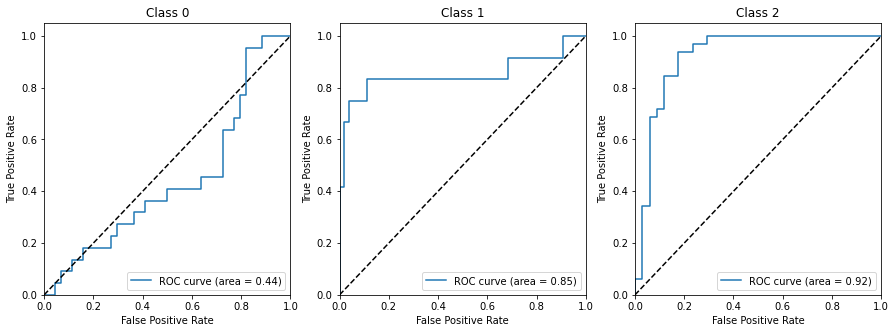

roc_auc_score:  0.7374600756025296


In [13]:
# ROC & AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(n_classes)):
    plt.subplot(131+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()

print("roc_auc_score: ", roc_auc_score(y_test, y_score, multi_class='raise'))